In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Read the data:

In [7]:
def read_data(filename):
    dataframe = pd.read_csv(filename, sep = ",")
    return dataframe
df = read_data("Placement_Data_Full_Class.csv")


### Statistics:

In [7]:
stats = df.describe()
stats

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Gender differences:

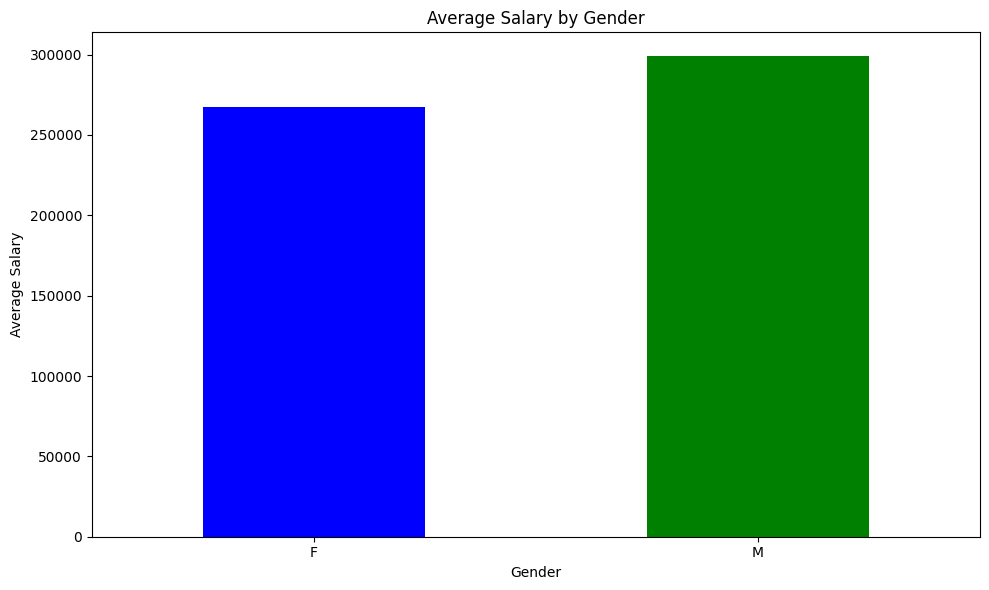

In [8]:

# Calculate average salary by gender
average_salary_by_gender = df.groupby("gender")["salary"].mean()

# Create the bar plot using matplotlib
plt.figure(figsize=(10, 6))
average_salary_by_gender.plot(kind='bar', color=['blue', 'green'])

# Set the title and labels
plt.title("Average Salary by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Salary")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


### Difference between genders on different education levels:

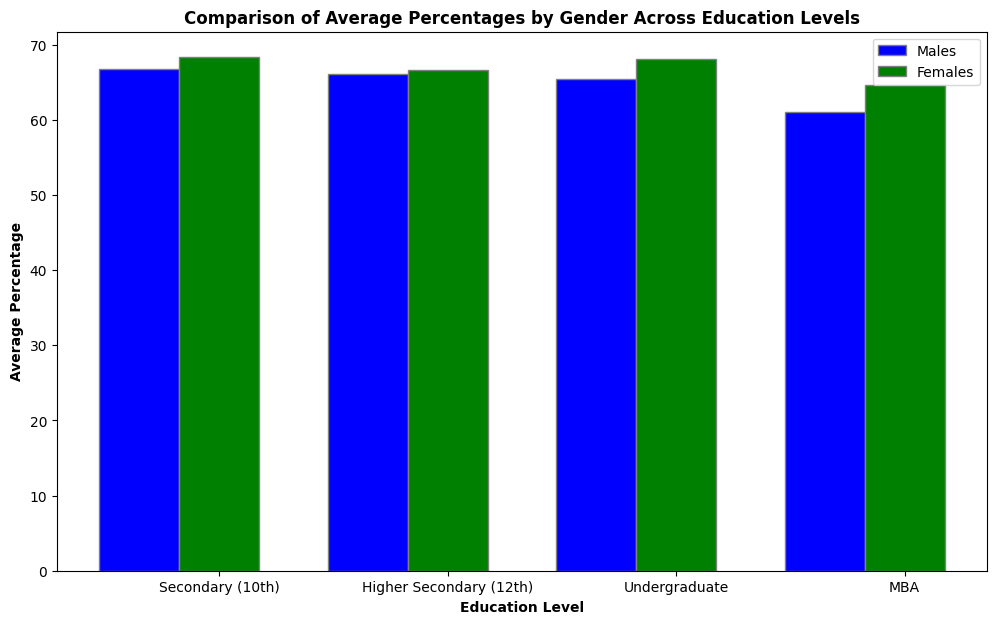

In [9]:

# Calculate average percentages for each level of education by gender
average_ssc_p = df.groupby("gender")["ssc_p"].mean()
average_hsc_p = df.groupby("gender")["hsc_p"].mean()
average_degree_p = df.groupby("gender")["degree_p"].mean()
average_mba_p = df.groupby("gender")["mba_p"].mean()

# Prepare data for plotting
labels = ['Secondary (10th)', 'Higher Secondary (12th)', 'Undergraduate', 'MBA']
male_averages = [average_ssc_p['M'], average_hsc_p['M'], average_degree_p['M'], average_mba_p['M']]
female_averages = [average_ssc_p['F'], average_hsc_p['F'], average_degree_p['F'], average_mba_p['F']]

# Set width of bar
barWidth = 0.35

# Set position of bar on X axis
r1 = range(len(male_averages))
r2 = [x + barWidth for x in r1]

# Create the bar plot
plt.figure(figsize=(12, 7))
plt.bar(r1, male_averages, color='blue', width=barWidth, edgecolor='grey', label='Males')
plt.bar(r2, female_averages, color='green', width=barWidth, edgecolor='grey', label='Females')

# Title & subtitle
plt.title("Comparison of Average Percentages by Gender Across Education Levels", fontweight='bold')

# Add xticks on the middle of the group bars
plt.xlabel('Education Level', fontweight='bold')
plt.ylabel('Average Percentage', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(male_averages))], labels)

# Create legend & show graphic
plt.legend()
plt.show()

#### Regression:


In [31]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

logreg = LogisticRegression(max_iter=1000)

# Drop rows with missing 'salary' values for this regression analysis
df_cleaned = df.dropna(subset=['salary'])

# Selecting features and target variable
features = df_cleaned[['gender', 'ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'specialisation', 'mba_p']]
#features = df_cleaned[['gender', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']]
target = df_cleaned['salary']

# Convert categorical variables into dummy variables
features_encoded = pd.get_dummies(features, drop_first=True)


# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)


# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(9461647543.647696, -0.11914120925097138)

### Evaluating performance:

In [32]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets